Company status transitions
==========================

In [1]:
import networkx as nx
from pandas import DataFrame
from numpy import zeros
import matplotlib.pyplot as plt

from cvrminer.cvrmongo import CvrMongo

In [2]:
# Connect to Mongo database
cvr_mongo = CvrMongo()

In [3]:
# Iterate over all companies
all_statuses = []
for company in cvr_mongo.iter_companies():
    statuses = company['virksomhedsstatus']
    if statuses:
        # Some companies do not have this list
        all_statuses.append([status['status'] for status in statuses])

In [4]:
# Construct adjacency matrix
unique_statuses = list(set([status for statuses in all_statuses for status in statuses]))
unique_statuses = ['Start'] + unique_statuses + ['End']
n_status = len(unique_statuses)

adjacency_matrix = DataFrame(zeros((n_status, n_status)),
                              index=unique_statuses, columns=unique_statuses)

for statuses in all_statuses:
    for status1, status2 in zip(['Start'] + statuses, statuses + ['End']):
        adjacency_matrix.ix[status1, status2] += 1
        
adjacency_matrix

,Start,OPLØST EFTER FUSION,NORMAL,UNDER REASSUMMERING,UDEN RETSVIRKNING,TVANGSOPLØST,UNDER KONKURS,OPLØST EFTER ERKLÆRING,OPLØST,UNDER FRIVILLIG LIKVIDATION,...,AKTIV,UNDER REASUMMATION,UNDER REKONSTRUKTION,UNDER REASSUMERING,OPLØST EFTER TVANGSOPLØSNING,OPLØST EFTER KONKURS,SLETTET,SLETTES,OPLØST EFTER FRIVILLIG LIKVIDATION,End
Start,0.0,10.0,518349.0,0.0,3198.0,2.0,7.0,4.0,1.0,6.0,...,4.0,0.0,0.0,3.0,0.0,0.0,34.0,0.0,0.0,0.0
OPLØST EFTER FUSION,0.0,6.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20619.0
NORMAL,0.0,20308.0,1219.0,0.0,0.0,83.0,37238.0,38819.0,2.0,42578.0,...,4.0,0.0,306.0,21.0,0.0,233.0,8425.0,2.0,202.0,273002.0
UNDER REASSUMMERING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
UDEN RETSVIRKNING,0.0,0.0,3198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TVANGSOPLØST,0.0,0.0,9.0,0.0,0.0,17.0,172.0,0.0,0.0,18.0,...,0.0,0.0,0.0,353.0,0.0,9.0,0.0,0.0,15.0,58294.0
UNDER KONKURS,0.0,12.0,426.0,0.0,0.0,327.0,29.0,4.0,0.0,32.0,...,0.0,0.0,1.0,0.0,0.0,65670.0,0.0,0.0,0.0,8580.0
OPLØST EFTER ERKLÆRING,0.0,0.0,93.0,1.0,0.0,0.0,0.0,9.0,0.0,8.0,...,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,39331.0
OPLØST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
UNDER FRIVILLIG LIKVIDATION,0.0,43.0,1241.0,0.0,0.0,9.0,807.0,438.0,0.0,17.0,...,0.0,0.0,2.0,102.0,0.0,17.0,121.0,0.0,36765.0,1669.0


In [5]:
# Convert to Networkx graph
graph = nx.from_numpy_matrix(adjacency_matrix.values, create_using=nx.DiGraph())
graph = nx.relabel_nodes(graph, dict(enumerate(adjacency_matrix.columns)))

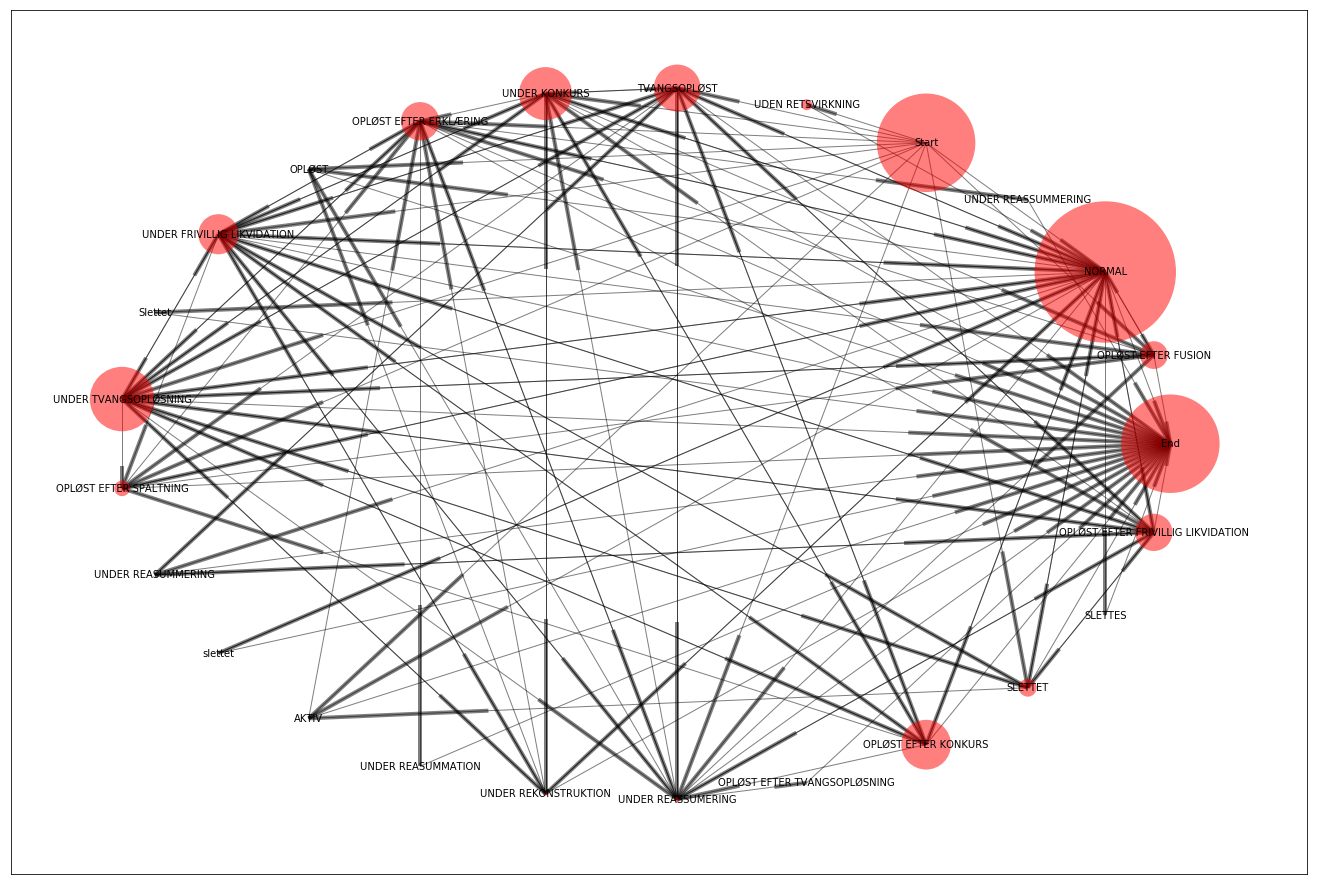

In [16]:
# Render the graph
pos = nx.layout.circular_layout(graph)

node_sizes = adjacency_matrix.sum(axis=0) + adjacency_matrix.sum(axis=1)
node_sizes = 20000 * node_sizes / max(node_sizes)
# nodes node in order between graph and adjacency matrix
node_sizes = [node_sizes[node] for node in graph.nodes()]  

nx.draw_networkx_nodes(graph, pos=pos, node_size=node_sizes,
                       node_color='r', alpha=0.5, linewidths=0)
nx.draw_networkx_edges(graph, nodelist=graph.nodes(), pos=pos,
                       alpha=0.5, color='r', linewidths=10)

positions = [pos[node] for node in graph.nodes()]
for i in range(len(positions)):
    plt.text(positions[i][0], positions[i][1], graph.nodes()[i], 
             horizontalalignment='center', verticalalignment='center')

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_position([0, 0, 1, 1])
    
plt.gcf().set_size_inches(18, 12, forward=True)
plt.savefig('Company status transitions.png')
plt.show()